In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import pickle
plt.style.use('mesa.mplstyle10')

### Loading the history and profile files 

In [3]:
# The below file belonds to a star with initial mass of 35 Msun and Z = 1e-4
dir_path = './data/MESA_LOGS/0.05/'
fname = 'history'
df_hist = pd.read_csv(dir_path + fname + '.data', delim_whitespace=True, header  = 4) 
df_hist.head(2)

,model_number,star_age,star_mass,star_mdot,log_dt,num_zones,log_total_angular_momentum,mass_conv_core,mix_type_1,mix_qtop_1,mix_type_2,mix_qtop_2,mix_type_3,mix_qtop_3,mix_type_4,mix_qtop_4,mix_type_5,mix_qtop_5,mix_type_6,mix_qtop_6,mix_type_7,mix_qtop_7,mix_type_8,mix_qtop_8,mix_type_9,mix_qtop_9,mix_type_10,mix_qtop_10,mix_type_11,mix_qtop_11,mix_type_12,mix_qtop_12,mix_type_13,mix_qtop_13,mix_type_14,mix_qtop_14,mix_type_15,mix_qtop_15,mix_type_16,mix_qtop_16,mix_type_17,mix_qtop_17,mix_type_18,mix_qtop_18,mix_type_19,mix_qtop_19,mix_type_20,mix_qtop_20,mix_relr_type_1,mix_relr_top_1,mix_relr_type_2,mix_relr_top_2,mix_relr_type_3,mix_relr_top_3,mix_relr_type_4,mix_relr_top_4,mix_relr_type_5,mix_relr_top_5,mix_relr_type_6,mix_relr_top_6,mix_relr_type_7,mix_relr_top_7,mix_relr_type_8,mix_relr_top_8,mix_relr_type_9,mix_relr_top_9,mix_relr_type_10,mix_relr_top_10,mix_relr_type_11,mix_relr_top_11,mix_relr_type_12,mix_relr_top_12,mix_relr_type_13,mix_relr_top_13,mix_relr_type_14,mix_relr_top_14,mix_relr_type_15,mix_relr_top_15,mix_relr_type_16,mix_relr_top_16,mix_relr_type_17,mix_relr_top_17,mix_relr_type_18,mix_relr_top_18,mix_relr_type_19,mix_relr_top_19,mix_relr_type_20,mix_relr_top_20,epsnuc_M_1,epsnuc_M_2,epsnuc_M_3,epsnuc_M_4,epsnuc_M_5,epsnuc_M_6,epsnuc_M_7,epsnuc_M_8,burn_type_1,burn_qtop_1,burn_type_2,burn_qtop_2,burn_type_3,burn_qtop_3,burn_type_4,burn_qtop_4,burn_type_5,burn_qtop_5,burn_type_6,burn_qtop_6,burn_type_7,burn_qtop_7,burn_type_8,burn_qtop_8,burn_type_9,burn_qtop_9,burn_type_10,burn_qtop_10,burn_type_11,burn_qtop_11,burn_type_12,burn_qtop_12,burn_type_13,burn_qtop_13,burn_type_14,burn_qtop_14,burn_type_15,burn_qtop_15,burn_type_16,burn_qtop_16,burn_type_17,burn_qtop_17,burn_type_18,burn_qtop_18,burn_type_19,burn_qtop_19,burn_type_20,burn_qtop_20,he_core_mass,he_core_radius,c_core_mass,c_core_radius,o_core_mass,o_core_radius,si_core_mass,fe_core_mass,log_LH,log_LHe,log_LZ,log_Lnuc,log_Lneu,log_Teff,log_L,log_R,log_g,gravity,log_center_T,log_center_Rho,log_center_P,center_mu,center_ye,center_abar,center_h1,center_he4,center_c12,center_n14,center_o16,center_ne20,center_mg24,center_si28,center_al27,center_fe56,surface_h1,surface_he4,surface_li7,surface_c12,surface_n14,surface_o16,surface_ne20,surface_mg24,surface_si28,surface_al27,surface_fe56,total_mass_h1,total_mass_he4,total_mass_ni56,pp,cno,tri_alfa,burn_c,burn_n,burn_o,burn_ne,burn_na,burn_mg,burn_si,burn_s,burn_ar,burn_ca,burn_ti,burn_cr,burn_fe,c12_c12,c12_o16,o16_o16,photo,v_surf,v_div_csound_surf,num_retries,relax_count,log_R_098,log_R_095,log_R_090,helium_core_mass,co_core_mass,log_R_100,log_R_vesc,log_R_vesc_098,log_R_vesc_095,log_R_vesc_090,M_below_vesc,u_flag,U_ejecta,T_ejecta,Omega_ejecta,gamma_integral,max_velocity,min_velocity,yr_since_coll,total_J,total_J_bel_vesc
0,1,13.798437,34.999982,-0.000001,1.139830,1233,-99.0,34.697205,1,0.991349,0,1.000000,9,1.000000,1,1.0,0,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,1,0.766047,0,0.992112,9,0.992750,1,0.998194,0,1.000000,-1,1.000000,-1,1.000000,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,-1,1.0,0.0,0.0,4.077621e+34,5.083977e+34,-20.0,-20.0,-20.0,-20.0,7,0.028686,6,0.225085,5,0.424474,4,0.585867,3,0.702033,2,0.785989,1,0.847232,0,1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,34.999982,5.051116,0.0,0.0,0.0,0.0,0.0,0.0,6.334433,-13.975373,-99.00000,6.334433,5.994712,4.898120,5.953950,0.703387,4.575361,37614.976106,7.818298,0.951745,16.924691,1.331379,0.500448,3.989578,0.000896,0.999003,0.000007,0.000017,0.000046,0.00001,0.00002,0.0,0.0,0.0,0.0009,0.998971,0.0,0.000017,0.000005,0.000046,0.00001,0.00002,0.0,0.0,0.0,0.031364,34.965093,0.0,6.330951,4.236759,-13.975373,-11.402181,-12.991141,-18.627225,-46.194591,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,35.432475,0.000006,0,0.0,0.55

In [4]:
df_profile = pd.read_csv(dir_path + 'profile82' + '.data', delim_whitespace=True, header  = 4) 
df_profile.head(2)

,zone,logT,logRho,logP,logR,luminosity,eps_grav,net_nuclear_energy,net_energy,eps_nuc_plus_nuc_neu,log_Ledd,log_Lrad_div_Ledd,velocity,entropy,mixing_type,csound,v_div_csound,eta,mu,q,radius,tau,pgas_div_ptotal,logPgas,energy,grada,gamma1,free_e,x_mass_fraction_H,y_mass_fraction_He,z_mass_fraction_metals,abar,ye,log_opacity,eps_nuc,non_nuc_neu,eps_mdot,ergs_mdot,ergs_error,eps_grav_plus_eps_mdot,ergs_eps_grav_plus_eps_mdot,mlt_mixing_type,gradT_sub_grada,gradT_div_grada,log_mlt_Gamma,log_D_mix,log_conv_vel,conv_vel_div_csound,log_mlt_D_mix,pressure_scale_height,log_D_conv,log_D_semi,log_D_ovr,log_D_thrm,gradT,gradr,gradL,mass,dq,x,y,z,neut,h1,prot,he3,he4,c12,n14,o16,ne20,mg24,si28,s32,ar36,ca40,ti44,cr48,cr56,fe52,fe54,fe56,co56,ni56,pp,cno,tri_alfa,burn_c,burn_n,burn_o,burn_ne,burn_na,burn_mg,burn_si,burn_s,burn_ar,burn_ca,burn_ti,burn_cr,burn_fe,c12_c12,c12_o16,o16_o16,pnhe4,photo,ni56_co56,co56_fe56,other,omega,log_j_rot,log_J_inside,i_rot,fp_rot,ft_rot,log_am_nu,brunt_N2,brunt_N2_structure_term,brunt_N2_composition_term,vesc,v_div_vesc,specific_grav_e,specific_kin_e,specific_thermal_e,total_specific_e,mlt_vc,spin_parameter
0,1,5.395340,-7.541547,7.002761,-0.135271,1.717322e+06,0.0,0.0,0.0,3.509014e-31,6.269654,-0.034801,102235.290956,83.560048,5,2.166849e+07,0.004718,-18.051518,1.332364,1.0,0.732367,0.666667,0.044285,5.649014,1.046361e+15,0.250048,1.340755,0.202792,0.000894,0.999005,0.000101,3.989612,0.500447,-0.619133,3.374031e-31,0.0,-2.648979e+11,-6.759704e+36,1.615905e+26,-2.648979e+11,-6.759704e+36,0,-0.008111,0.967562,-99.000000,12.684772,-99.0,0.0,-99.000000,0.002881,-99.0,-99.0,-99.0,-99.0,0.241936,0.241936,0.250048,34.171095,4.000000e-13,0.000894,0.999005,0.000101,0.0,0.000894,0.0,2.572115e-08,0.999005,0.000003,0.000022,0.000046,6.916436e-09,1.352495e-08,4.638012e-07,0.000007,0.000001,0.000001,0.0,0.0,0.0,0.0,0.000001,0.00002,0.0,0.0,3.374031e-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000499,17.938224,51.369238,1.737402e+21,1.0,1.0,14.857521,0.006173,0.006173,0.0,4.219149e+08,0.000242,-8.900607e+16,5.226027e+09,1.798784e+20,1.797894e+20,0.0,0.227071
1,2,5.415907,-7.424909,7.087614,-0.135518,1.717324e+06,0.0,0.0,0.0,1.032568e-30,6.269654,-0.034801,77212.025220,75.712825,5,2.089733e+07,0.003606,-17.853987,1.332364,1.0,0.731950,0.867034,0.049957,5.786212,9.710887e+14,0.250061,1.341713,0.202793,0.000894,0.999005,0.000101,3.989612,0.500447,-0.621796,9.928473e-31,0.0,-4.320698e+11,-2.182766e+37,1.821021e+27,-4.320698e+11,-2.182766e+37,9,-0.007320,0.970726,-15.061241,12.684772,-99.0,0.0,1.633115,0.002675,-99.0,-99.0,-99.0,-99.0,0.242732,0.242732,0.250052,34.171095,7.918886e-13,0.000894,0.999005,0.000101,0.0,0.000894,0.0,2.572115e-08,0.999005,0.000003,0.000022,0.000046,6.916436e-09,1.352495e-08,4.638012e-07,0.000007,0.000001,0.000001,0.0,0.0,0.0,0.0,0.000001,0.00002,0.0,0.0,9.928473e-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000499,17.937727,51.369238,1.735413e+21,1.0,1.0,14.861660,0.005489,0.005489,0.0,4.220350e+08,0.000183,-8.905677e+16,2.980848e+09,1.441811e+20,1.440920e+20,0.0,0.227071


### Plotting the angular momentum profile  

In [5]:
# some constants
c = 2.99792e10  # speed of light
G = 6.674e-8     # Newton's constant
rsun = 6.96e10         # solar radius
msun = 1.98847e33      # solar mass
R_unit = G/c**2
J_unit = G*msun**2/c

In [6]:
def calculate_risco(M, a):
    z1 = 1 + (1 - a**2 / M**2)**(1/3) * ((1 + a / M)**(1/3) + (1 - a / M)**(1/3))
    z2 = np.sqrt(3 * a**2 / M**2 + z1**2)
    r_isco = M * (3 + z2 - np.sqrt((3 - z1) * (3 + z1 + 2 * z2)))
    return r_isco

def u_phi(M, r, a):
    numerator = np.sqrt(M) * (r**2 - 2 * a * np.sqrt(M) * r**(1/2) + a**2)
    denominator = r**(3/4) * np.sqrt(r**(3/2) - 3 * M * r**(1/2) + 2 * a * np.sqrt(M))
    u_phi_r = numerator / denominator
    return u_phi_r * c

def u_t(M, r, a):
    numerator = r**(3/2) - 2 * M * r**(1/2) + a * np.sqrt(M)
    denominator = r**(3/4) * np.sqrt(r**(3/2) - 3 * M * r**(1/2) + 2 * a * np.sqrt(M))
    return numerator / denominator

$M_{\rm exp}$ =  34.17109425649106
$M_{\rm exp}$ =  33.38036586084291


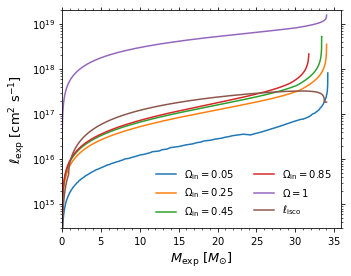

In [8]:
dir_path = './data/MESA_LOGS/0.05/'
df_profile = pd.read_csv(dir_path + 'profile40' + '.data', delim_whitespace=True, header  = 4) 
plt.plot(df_profile.loc[:,'mass'], 10**df_profile.loc[:,'log_j_rot'])
print('$M_{\\rm exp}$ = ', df_profile.loc[0,'mass'])

# --------------- Another model ----------------
dir_path = './data/MESA_LOGS/0.25/'
df_profile = pd.read_csv(dir_path + 'profile84' + '.data', delim_whitespace=True, header  = 4) 
plt.plot(df_profile.loc[:,'mass'], 10**df_profile.loc[:,'log_j_rot'])

# --------------- Another model ----------------
dir_path = './data/MESA_LOGS/0.45/'
df_profile = pd.read_csv(dir_path + 'profile82' + '.data', delim_whitespace=True, header  = 4) 
plt.plot(df_profile.loc[:,'mass'], 10**df_profile.loc[:,'log_j_rot'])
print('$M_{\\rm exp}$ = ', df_profile.loc[0,'mass'])

# --------------- Another model ----------------
dir_path = './data/MESA_LOGS/0.85/'
df_profile = pd.read_csv(dir_path + 'profile93' + '.data', delim_whitespace=True, header  = 4) 
plt.plot(df_profile.loc[:,'mass'], 10**df_profile.loc[:,'log_j_rot'])


#------------------------- Critically rotating -----------
dir_path = './data/MESA_LOGS/0.25/'
df_profile = pd.read_csv(dir_path + 'profile84' + '.data', delim_whitespace=True, header  = 4) 
M = df_profile.loc[:,'mass']*msun
R = 10**df_profile.loc[:,'logR']*rsun
j_cric = np.sqrt(G*M/R**3) * R**2
plt.plot(df_profile.loc[:,'mass'], j_cric)


# -------------- jisco -------------
# M = df_profile.loc[:,'mass']*msun
J = 10**df_profile.loc[:,'log_J_inside']
abh = J*c/(G*M**2)
abh[abh>=1] = .99994
M_ = M*R_unit #u_t(M_, Risco, abh*M_)*M*R_unit
Risco =  calculate_risco(M_, abh*M_)
jisco = u_phi(M_, Risco, abh*M_)
plt.plot(df_profile.loc[:,'mass'], jisco)


plt.xlabel('$M_{\\rm exp} \,\, [M_{\\odot}$]')
plt.ylabel('$\\ell_{\\rm exp}$ [cm$^2$ s$^{-1}$]')
# plt.xscale('log')
plt.yscale('log')
plt.xlim(0,)
plt.legend(['$\\Omega_{\\rm in} = 0.05$', '$\\Omega_{\\rm in} = 0.25$', '$\\Omega_{\\rm in} = 0.45$', 
                        '$\\Omega_{\\rm in} = 0.85$', '$\\Omega = 1$', '$\\ell_{\\rm isco}$'], ncol =2,\
           fontsize = 10)
# plt.xlim(1, 35)
plt.ylim(3e14, 2e19)
plt.savefig('./figures/angular_momentum_profile_35Msun')

### Plotting the disk radius evolution 

In [10]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

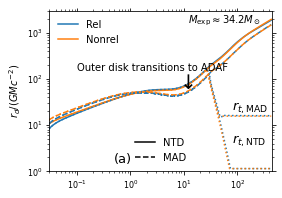

In [14]:
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

gs = plt.GridSpec(3, 1, hspace = 0.19, figure=plt.figure(figsize=(4, 10)))
msun = 2e33

# Plot 1:
ax1 = plt.subplot(gs[0,0])
# -----------  Input files ---------------------
f_rel = open('./Python_scripts/output/rel_NTD', 'rb')
file_rel = pickle.load(f_rel)
f_nonrel = open('./Python_scripts/output/nonrel_NTD', 'rb')
file_nonrel = pickle.load(f_nonrel)

f_relMAD = open('./Python_scripts/output/rel_MAD', 'rb')
file_relMAD = pickle.load(f_relMAD)
f_nonrelMAD = open('./Python_scripts/output/nonrel_MAD', 'rb')
file_nonrelMAD = pickle.load(f_nonrelMAD)

#  ------------- Adding Legends ---------------------
ax1.plot(0,0, linestyle = '-', color = 'k')
ax1.plot(0,0, linestyle = '--', color = 'k')
# Adding Legends
legend1 = ax1.legend(['NTD', 'MAD'], loc = 'lower center', fontsize = 10)


# ----------- Plotting Rd for NTD ----------------
ax1.plot(file_rel[4], file_rel[1], color = colors[0], label = 'Rel')
ax1.plot(file_nonrel[4], file_nonrel[1], colors[1], label = 'Nonrel')

# ----------- Plotting Rd for MAD----------------
ax1.plot(file_relMAD[4], file_relMAD[1], color = colors[0], linestyle = '--')
ax1.plot(file_nonrelMAD[4], file_nonrelMAD[1], colors[1], linestyle = '--')

# ----------- Plotting Rt ----------------
ax1.plot(file_rel[4], file_rel[6], colors[0], linestyle = ':')
ax1.plot(file_nonrel[4], file_nonrel[6], colors[1], linestyle = ':')

# ----------- Plotting Rt ----------------
ax1.plot(file_relMAD[4], file_relMAD[6], colors[0], linestyle = ':')
ax1.plot(file_nonrelMAD[4], file_nonrelMAD[6], colors[1], linestyle = ':')

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlim(.03,450)
ax1.set_ylim(1e0,3e3)
ax1.text(.1, 150, "Outer disk transitions to ADAF", fontsize = 10)
ax1.text(7, 60, "$\\downarrow$", fontsize = 20)
# ax1.text(2.5, 60, "$\downarrow$", fontsize = 20)
ax1.text(80, 4, "$r_{t, {\\rm NTD}}$")
ax1.text(80, 20, "$r_{t, {\\rm MAD}}$")
ax1.text(.5,  1.5, '(a)')
ax1.text(12, 1.6e3, "$M_{\\rm exp} \\approx 34.2 M_\\odot$", fontsize = 10)
ax1.set_ylabel('$r_d/(GMc^{-2})$', fontsize = 10)
ax1.legend(fontsize = 10)
ax1.add_artist(legend1)


# --------- Need to generate data to run the below plots (use the same python script with new input profile) --------
# -------------------------------------------------------------------------------------------------------------------

# # Plot 2:
# ax2 = plt.subplot(gs[1, 0])
# # ---------------------- Input files ----------------
# f_rel = open('/nesi/project/uoa03218/Collapsars/rt_unchanged/rel_NTD', 'rb')
# file_rel = pickle.load(f_rel)
# f_nonrel = open('/nesi/project/uoa03218/Collapsars/rt_unchanged/nonrel_NTD', 'rb')
# file_nonrel = pickle.load(f_nonrel)

# f_relMAD = open('/nesi/project/uoa03218/Collapsars/rt_unchanged/rel_MAD', 'rb')
# file_relMAD = pickle.load(f_relMAD)
# f_nonrelMAD = open('/nesi/project/uoa03218/Collapsars/rt_unchanged/nonrel_MAD', 'rb')
# file_nonrelMAD = pickle.load(f_nonrelMAD)

# # ----------- Plotting Rd for NTD ----------------
# ax2.plot(file_rel[4], file_rel[1], color = colors[0], label = 'Rel')
# ax2.plot(file_nonrel[4], file_nonrel[1], colors[1], label = 'Nonrel')

# # ----------- Plotting Rd for MAD----------------
# ax2.plot(file_relMAD[4], file_relMAD[1], color = colors[0], linestyle = '--')
# ax2.plot(file_nonrelMAD[4], file_nonrelMAD[1], colors[1], linestyle = '--')

# # ----------- Plotting Rt NTD ----------------
# ax2.plot(file_rel[4], file_rel[6], colors[0], linestyle = ':')
# ax2.plot(file_nonrel[4], file_nonrel[6], colors[1], linestyle = ':')

# # ----------- Plotting Rt MAD ----------------
# ax2.plot(file_relMAD[4], file_relMAD[6], colors[0], linestyle = ':')
# ax2.plot(file_nonrelMAD[4], file_nonrelMAD[6], colors[1], linestyle = ':')

# ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.set_xlim(.03,450)
# ax2.set_ylim(1e0,2e3)
# ax2.text(.1, 270, "Outer disk transitions to ADAF",  fontsize = 10)
# ax2.text(20, 160, "$\\downarrow$", fontsize = 15)
# ax2.text(80, 1.5, "$r_{t, {\\rm NTD}}$")
# ax2.text(80, 20, "$r_{t, {\\rm MAD}}$")
# ax2.text(.5,  1.5, '(b)')
# ax2.text(11, 1e3, "$M_{\\rm exp} \\approx 33.4 M_\\odot$", fontsize = 10)
# ax2.set_ylabel('$r_d/(GMc^{-2})$', fontsize = 10)

# # Plot 3:
# ax3 = plt.subplot(gs[2,0])
# # ---------------- Input files ---------------------
# f_rel = open('/nesi/project/uoa03218/Collapsars/rt_moved/rel_NTD', 'rb')
# file_rel = pickle.load(f_rel)
# f_nonrel = open('/nesi/project/uoa03218/Collapsars/rt_moved/nonrel_NTD', 'rb')
# file_nonrel = pickle.load(f_nonrel)

# f_relMAD = open('/nesi/project/uoa03218/Collapsars/rt_moved/rel_MAD', 'rb')
# file_relMAD = pickle.load(f_relMAD)
# f_nonrelMAD = open('/nesi/project/uoa03218/Collapsars/rt_moved/nonrel_MAD', 'rb')
# file_nonrelMAD = pickle.load(f_nonrelMAD)

# # ----------- Plotting Rd for NTD ----------------
# ax3.plot(file_rel[4], file_rel[1], color = colors[0], label = 'Rel')
# ax3.plot(file_nonrel[4], file_nonrel[1], colors[1], label = 'Nonrel')

# # ----------- Plotting Rd for MAD----------------
# ax3.plot(file_relMAD[4], file_relMAD[1], color = colors[0], linestyle = '--')
# ax3.plot(file_nonrelMAD[4], file_nonrelMAD[1], colors[1], linestyle = '--')

# # ----------- Plotting Rt ----------------
# ax3.plot(file_rel[4], file_rel[6], colors[0], linestyle = ':')
# ax3.plot(file_nonrel[4], file_nonrel[6], colors[1], linestyle = ':')

# # ----------- Plotting Rt ----------------
# ax3.plot(file_relMAD[4], file_relMAD[6], colors[0], linestyle = ':')
# ax3.plot(file_nonrelMAD[4], file_nonrelMAD[6], colors[1], linestyle = ':')

# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlim(.03,450)
# ax3.set_ylim(1e0,3e3)
# ax3.text(.05, 200, "Outer disk almost always ADAF",  fontsize = 10)
# ax3.text(80, 1.5, "$r_{t, {\\rm NTD}}$")
# ax3.text(80, 20, "$r_{t, {\\rm MAD}}$")
# ax3.text(7, 1.5e3, "$M_{\\rm exp} \\approx 33.4 M_\\odot$", fontsize = 10)
# ax3.text(.5,  1.5, '(c)')
# ax3.set_xlabel('time since disk formation [s]', fontsize = 10)
# ax3.set_ylabel('$r_d/(GMc^{-2})$', fontsize = 10)

# plt.savefig('./Disk_dynamics')


### Plotting some key parameters that characterise the collapsar evolution

In [15]:
f_rel = open('./Python_scripts/output/rel_NTD', 'rb')
file_rel = pickle.load(f_rel)
f_nonrel = open('./Python_scripts/output/nonrel_NTD', 'rb')
file_nonrel = pickle.load(f_nonrel)

f_relMAD = open('./Python_scripts/output/rel_MAD', 'rb')
file_relMAD = pickle.load(f_relMAD)
f_nonrelMAD = open('./Python_scripts/output/nonrel_MAD', 'rb')
file_nonrelMAD = pickle.load(f_nonrelMAD)

<ipython-input-16-c42c70ea9caa>:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


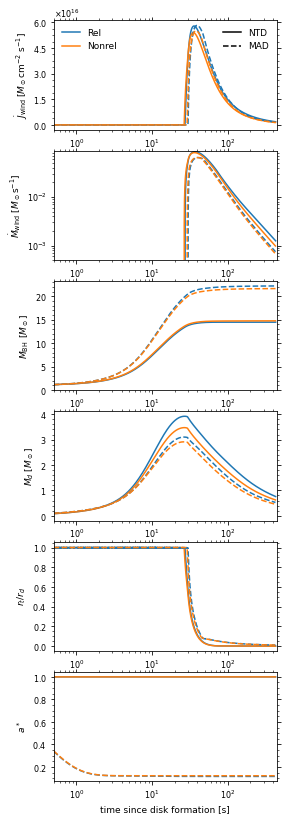

In [16]:
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

gs = plt.GridSpec(6, 1, hspace = 0.19, figure=plt.figure(figsize=(4, 14)))

# Plot 1:
#  ------------- Adding Legends ---------------------
ax1 = plt.subplot(gs[0, 0])
ax1.plot(0,0, linestyle = '-', color = 'k')
ax1.plot(0,0, linestyle = '--', color = 'k')
legend1 = ax1.legend(['NTD', 'MAD'], loc = 'upper right', fontsize = 9)
# ---------------------NTD -----------------
ax1.plot(file_rel[4], np.array(file_rel[3])/msun, label = 'Rel')
ax1.plot(file_nonrel[4], np.array(file_nonrel[3])/msun, label = 'Nonrel')
# # # -------------- MAD --------------------
ax1.plot(file_relMAD[4], np.array(file_relMAD[3])/msun, color = colors[0], linestyle = '--')
ax1.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[3])/msun, colors[1], linestyle = '--')
# # ---------------- Adding additional text -------------
# ax1.text(15, 4e48 , "$\\leftarrow$", fontsize = 20)
# ax1.text(2., 9e48 , "Disk transitions \n to ADAF")
ax1.set_xlim(.5,450)
# ax1.set_ylim(.05, 1.4e50)
ax1.set_xscale('log')
ax1.legend(loc = 'upper left', fontsize = 9)
ax1.add_artist(legend1)
ax1.set_ylabel('$\\dot{J}_{\\rm wind}$ [$M_\\odot$cm$^{-2}$ s$^{-1}$]', fontsize =9)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))


# Plot 2: 
ax2 = plt.subplot(gs[1, 0])
# ------------- NTD --------------------
ax2.plot(file_rel[4], np.array(file_rel[2]) / msun)
ax2.plot(file_nonrel[4], np.array(file_nonrel[2]) / msun)
# ------------- MAD --------------------
ax2.plot(file_relMAD[4], np.array(file_relMAD[2]) / msun, color = colors[0], linestyle = '--')
ax2.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[2])/msun, colors[1], linestyle = '--')
ax2.set_ylabel('$\dot{M}_{\\rm wind}$ [$M_\\odot$s$^{-1}$]', fontsize =9)
ax2.set_xlim(.5,450)
ax2.set_ylim(5e-4, )
ax2.set_xscale('log')
ax2.set_yscale('log')
# ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Plot 3: 
ax3 = plt.subplot(gs[2, 0])
# ------------ NTD ------------------
ax3.plot(file_rel[4], np.array(file_rel[5]) / msun)
ax3.plot(file_nonrel[4], np.array(file_nonrel[5]) / msun)
# -------------- MAD --------------------
ax3.plot(file_relMAD[4], np.array(file_relMAD[5]) / msun, color = colors[0], linestyle = '--')
ax3.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[5]) / msun, colors[1], linestyle = '--')
ax3.set_xlim(.5,450)
ax3.set_xscale('log')
# ax3.set_yscale('log')
ax3.set_ylabel('${M}_{\\rm BH} \,\,\, [M_\\odot]$', fontsize =9)
ax3.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))


#Plot 4:
# ------------ NTD ------------------
ax4 = plt.subplot(gs[3, 0])
ax4.plot(file_rel[4], np.array(file_rel[8]) / msun)
ax4.plot(file_nonrel[4], np.array(file_nonrel[8]) / msun)
# ---------------- MAD ----------------------
ax4.plot(file_relMAD[4], np.array(file_relMAD[8]) / msun, color = colors[0], linestyle = '--')
ax4.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[8]) / msun, color = colors[1], linestyle = '--')
ax4.set_xscale('log')
# plt.yscale('log')
ax4.set_xlim(.5,450)
ax4.set_ylabel('$M_d \,\, [M_\odot]$', fontsize =9)

# Plot 5:
ax5 = plt.subplot(gs[4, 0])
# ------------ NTD ------------------
ax5.plot(file_rel[4], np.array(file_rel[6]) / np.array(file_rel[1]))
ax5.plot(file_nonrel[4], np.array(file_nonrel[6]) / np.array(file_nonrel[1]))
# ------------ MAD ------------------
ax5.plot(file_relMAD[4], np.array(file_relMAD[6]) / np.array(file_relMAD[1]), color = colors[0],
                                                                                     linestyle = '--')
ax5.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[6]) / np.array(file_nonrelMAD[1]), color = colors[1],
                                                                                     linestyle = '--')
ax5.set_xlim(.5,450)
ax5.set_xscale('log')
# plt.yscale('log')
ax5.set_ylabel('$r_t/r_d$', fontsize =9)


#Plot 6:
ax6 = plt.subplot(gs[5, 0])
# ------------------ NTD ----------------
ax6.plot(file_rel[4], np.array(file_rel[7]))
ax6.plot(file_nonrel[4], np.array(file_nonrel[7]) )
# ----------------- MAD -------------------
ax6.plot(file_relMAD[4], np.array(file_relMAD[7]), color = colors[0], linestyle = '--')
ax6.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[7]), color = colors[1], linestyle = '--')
ax6.set_xscale('log')
ax6.set_xlim(.5,450)
ax6.set_ylabel('$a^*$', fontsize = 9)
ax6.set_xlabel('time since disk formation [s]', fontsize = 9)

plt.tight_layout()
# plt.savefig('Collapsar dynamics rt_unmodified')

### Same as above but for a more rapidly rotating model. Also not that $r_t$ have been move by a factor of 1/5
 ----- Need to generate thsi model from the Python script ------

In [34]:
# Replace the below with the location of the output 
f_rel = open('/nesi/project/uoa03218/Collapsars/rt_moved/rel_NTD', 'rb')
file_rel = pickle.load(f_rel)
f_nonrel = open('/nesi/project/uoa03218/Collapsars/rt_moved/nonrel_NTD', 'rb')
file_nonrel = pickle.load(f_nonrel)

f_relMAD = open('/nesi/project/uoa03218/Collapsars/rt_moved/rel_MAD', 'rb')
file_relMAD = pickle.load(f_relMAD)
f_nonrelMAD = open('/nesi/project/uoa03218/Collapsars/rt_moved/nonrel_MAD', 'rb')
file_nonrelMAD = pickle.load(f_nonrelMAD)

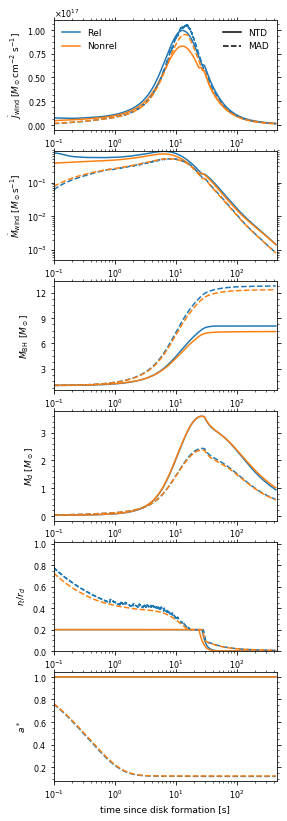

In [35]:
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

gs = plt.GridSpec(6, 1, hspace = 0.19, figure=plt.figure(figsize=(4, 14)))

# Plot 1:
#  ------------- Adding Legends ---------------------
ax1 = plt.subplot(gs[0, 0])
ax1.plot(0,0, linestyle = '-', color = 'k')
ax1.plot(0,0, linestyle = '--', color = 'k')
legend1 = ax1.legend(['NTD', 'MAD'], loc = 'upper right', fontsize = 9)
# ---------------------NTD -----------------
ax1.plot(file_rel[4], np.array(file_rel[3])/msun, label = 'Rel')
ax1.plot(file_nonrel[4], np.array(file_nonrel[3])/msun, label = 'Nonrel')
# # # -------------- MAD --------------------
ax1.plot(file_relMAD[4], np.array(file_relMAD[3])/msun, color = colors[0], linestyle = '--')
ax1.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[3])/msun, colors[1], linestyle = '--')
# # ---------------- Adding additional text -------------
# ax1.text(15, 4e48 , "$\\leftarrow$", fontsize = 20)
# ax1.text(2., 9e48 , "Disk transitions \n to ADAF")
ax1.set_xlim(.1,450)
# ax1.set_ylim(.05, 1.4e50)
ax1.set_xscale('log')
ax1.legend(loc = 'upper left', fontsize = 9)
ax1.add_artist(legend1)
ax1.set_ylabel('$\\dot{J}_{\\rm wind}$ [$M_\\odot$cm$^{-2}$ s$^{-1}$]', fontsize =9)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))


# Plot 2: 
ax2 = plt.subplot(gs[1, 0])
# ------------- NTD --------------------
ax2.plot(file_rel[4], np.array(file_rel[2]) / msun)
ax2.plot(file_nonrel[4], np.array(file_nonrel[2]) / msun)
# ------------- MAD --------------------
ax2.plot(file_relMAD[4], np.array(file_relMAD[2]) / msun, color = colors[0], linestyle = '--')
ax2.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[2])/msun, colors[1], linestyle = '--')
ax2.set_ylabel('$\dot{M}_{\\rm wind}$ [$M_\\odot$s$^{-1}$]', fontsize =9)
ax2.set_xlim(.1,450)
ax2.set_ylim(5e-4, )
ax2.set_xscale('log')
ax2.set_yscale('log')
# ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Plot 3: 
ax3 = plt.subplot(gs[2, 0])
# ------------ NTD ------------------
ax3.plot(file_rel[4], np.array(file_rel[5]) / msun)
ax3.plot(file_nonrel[4], np.array(file_nonrel[5]) / msun)
# -------------- MAD --------------------
ax3.plot(file_relMAD[4], np.array(file_relMAD[5]) / msun, color = colors[0], linestyle = '--')
ax3.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[5]) / msun, colors[1], linestyle = '--')
ax3.set_xlim(.1,450)
ax3.set_xscale('log')
# ax3.set_yscale('log')
ax3.set_ylabel('${M}_{\\rm BH} \,\,\, [M_\\odot]$', fontsize =9)
ax3.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))


#Plot 4:
# ------------ NTD ------------------
ax4 = plt.subplot(gs[3, 0])
ax4.plot(file_rel[4], np.array(file_rel[8]) / msun)
ax4.plot(file_nonrel[4], np.array(file_nonrel[8]) / msun)
# ---------------- MAD ----------------------
ax4.plot(file_relMAD[4], np.array(file_relMAD[8]) / msun, color = colors[0], linestyle = '--')
ax4.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[8]) / msun, color = colors[1], linestyle = '--')
ax4.set_xscale('log')
# plt.yscale('log')
ax4.set_xlim(.1,450)
ax4.set_ylabel('$M_d \,\, [M_\odot]$', fontsize =9)

# Plot 5:
ax5 = plt.subplot(gs[4, 0])
# ------------ NTD ------------------
ax5.plot(file_rel[4], np.array(file_rel[6]) / np.array(file_rel[1]))
ax5.plot(file_nonrel[4], np.array(file_nonrel[6]) / np.array(file_nonrel[1]))
# ------------ MAD ------------------
ax5.plot(file_relMAD[4], np.array(file_relMAD[6]) / np.array(file_relMAD[1]), color = colors[0],
                                                                                     linestyle = '--')
ax5.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[6]) / np.array(file_nonrelMAD[1]), color = colors[1],
                                                                                     linestyle = '--')
ax5.set_xlim(.1,450)
ax5.set_ylim(0,1.02)
ax5.set_xscale('log')
# plt.yscale('log')
ax5.set_ylabel('$r_t/r_d$', fontsize =9)


#Plot 6:
ax6 = plt.subplot(gs[5, 0])
# ------------------ NTD ----------------
ax6.plot(file_rel[4], np.array(file_rel[7]))
ax6.plot(file_nonrel[4], np.array(file_nonrel[7]) )
# ----------------- MAD -------------------
ax6.plot(file_relMAD[4], np.array(file_relMAD[7]), color = colors[0], linestyle = '--')
ax6.plot(file_nonrelMAD[4], np.array(file_nonrelMAD[7]), color = colors[1], linestyle = '--')
ax6.set_xscale('log')
ax6.set_xlim(.1,450)
ax6.set_ylabel('$a^*$', fontsize = 9)
ax6.set_xlabel('time since disk formation [s]', fontsize = 9)

plt.tight_layout()
# plt.savefig('Collapsar dynamics rt_moved')